<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/210618_01_%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8B%9C%EA%B0%84%EB%8C%80%EB%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

밤 11시에 사람들이 가장 많이 타는 역은 어디일까


승차 패턴 찾기<br> 
승차 시각이 1시간씩 늦어질 때 마다 인덱스 2씩 늘어남 <br> 승차 시작 시간의 인덱스 값 4 -> 4시부터 승차가 시작(첫차)<br> 
승차 시각(t) 와 승차 인원이 적힌 인덱스(i) 관계 분석 <br>
i = 4 + (t -4) * 2

In [ ]:
import csv

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))

for row in data :
  row[4:] = map(int, row[4:]) # 문자열을 정수형으로 변환 후 다시 저장
  a = row[4 + (t - 4) * 2] # 입력 받은 시각의 승차 인원 값 추출

  if a > max :
    max = a
    max_station = row[3] + '(' + row[1] + ')'
    
print(max_station, max)

몇 시의 승차인원이 가장 많은 역이 궁금하세요? : 5
홍대입구(2호선) 42966


<strong>한글 깨짐 처리하기</strong>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


시간대별 최대 승차 역 이름 및 승차 인원 막대 그래프로 표현하기

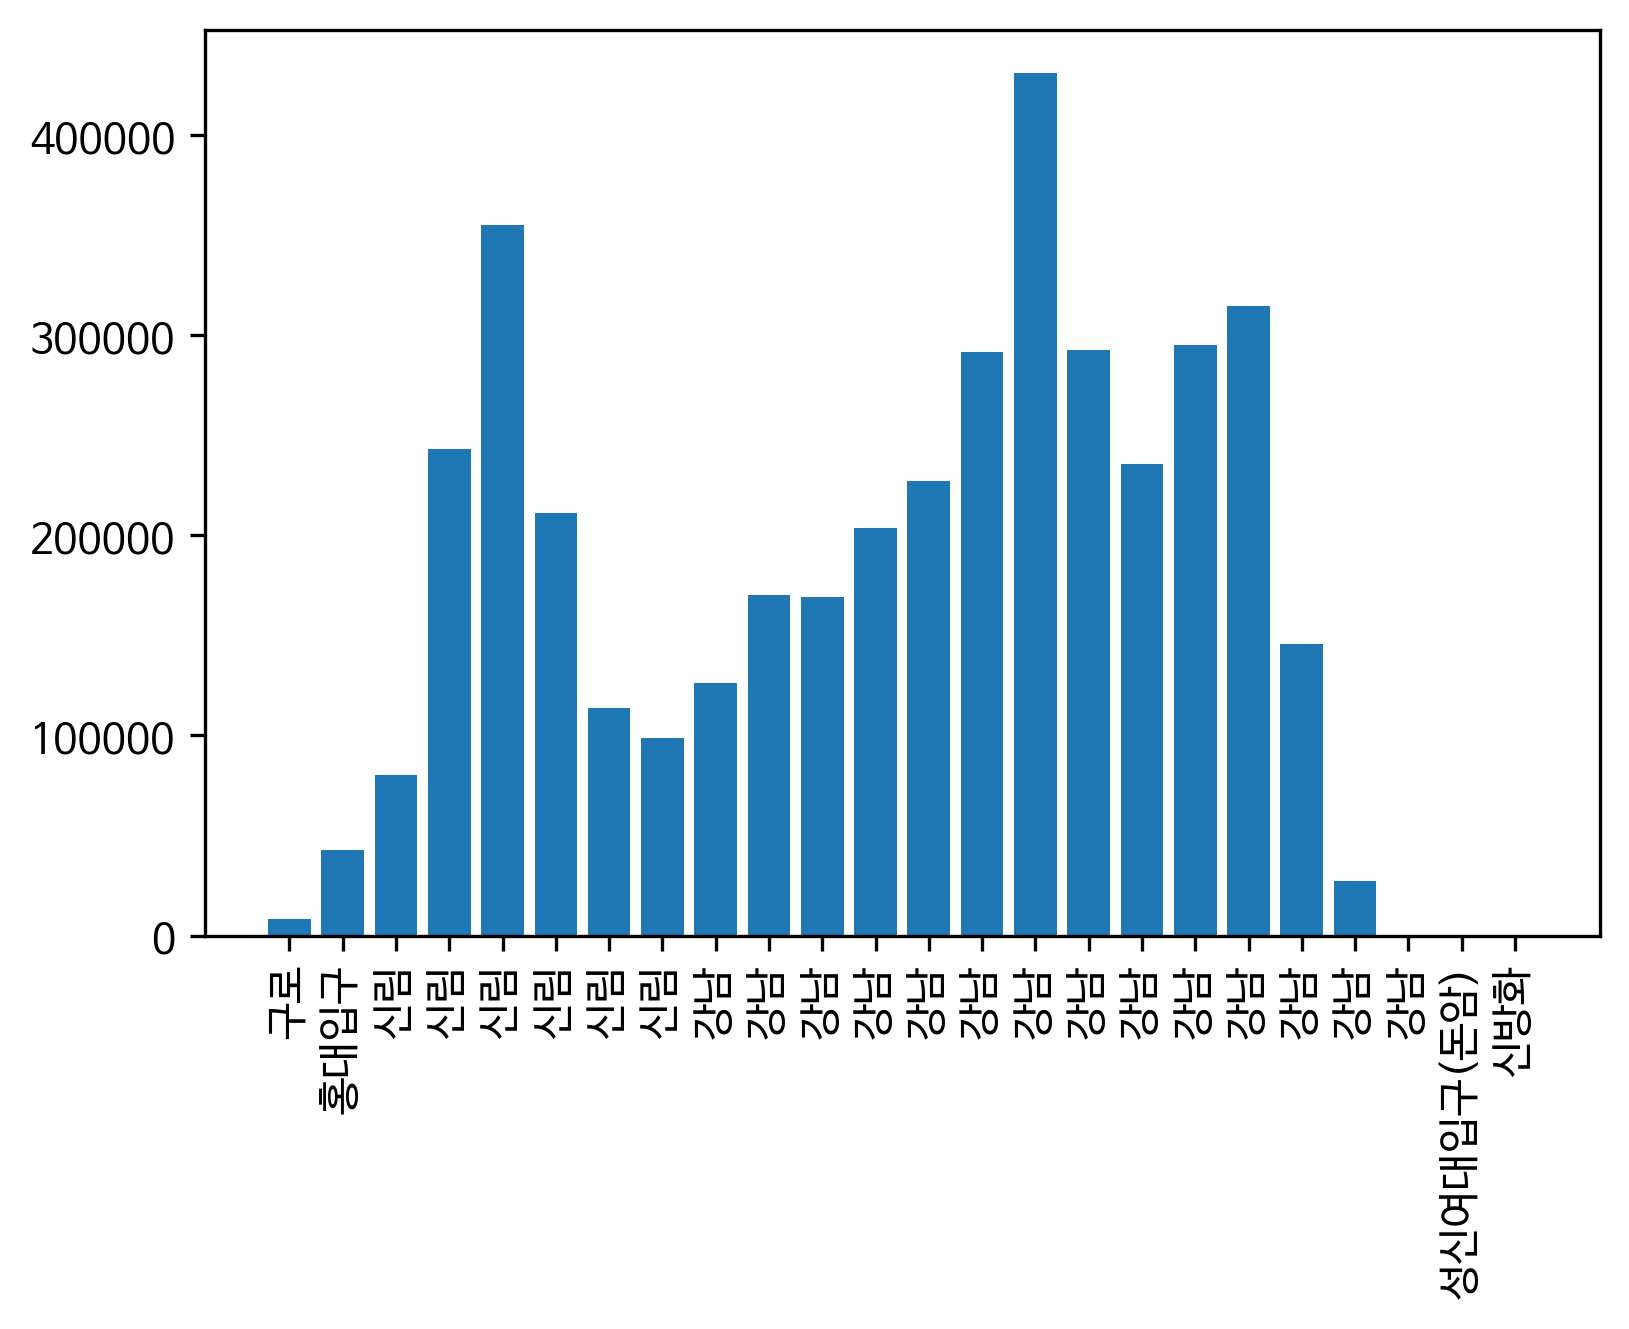

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for j in range(24) :
    a = row[4 + j * 2] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) -> 시작 인덱스 4
    if a > max[j] :
      max[j] = a
      max_station[j] = row[3]
# NanumBarunGothic
# 차트 설정
plt.figure(dpi=150) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
# 차트 그리기
plt.bar(range(24), max)
plt.xticks(range(24), max_station, rotation=90) # rotation=a 은 a도 만큼 x축의 글자를 돌린다
plt.show()

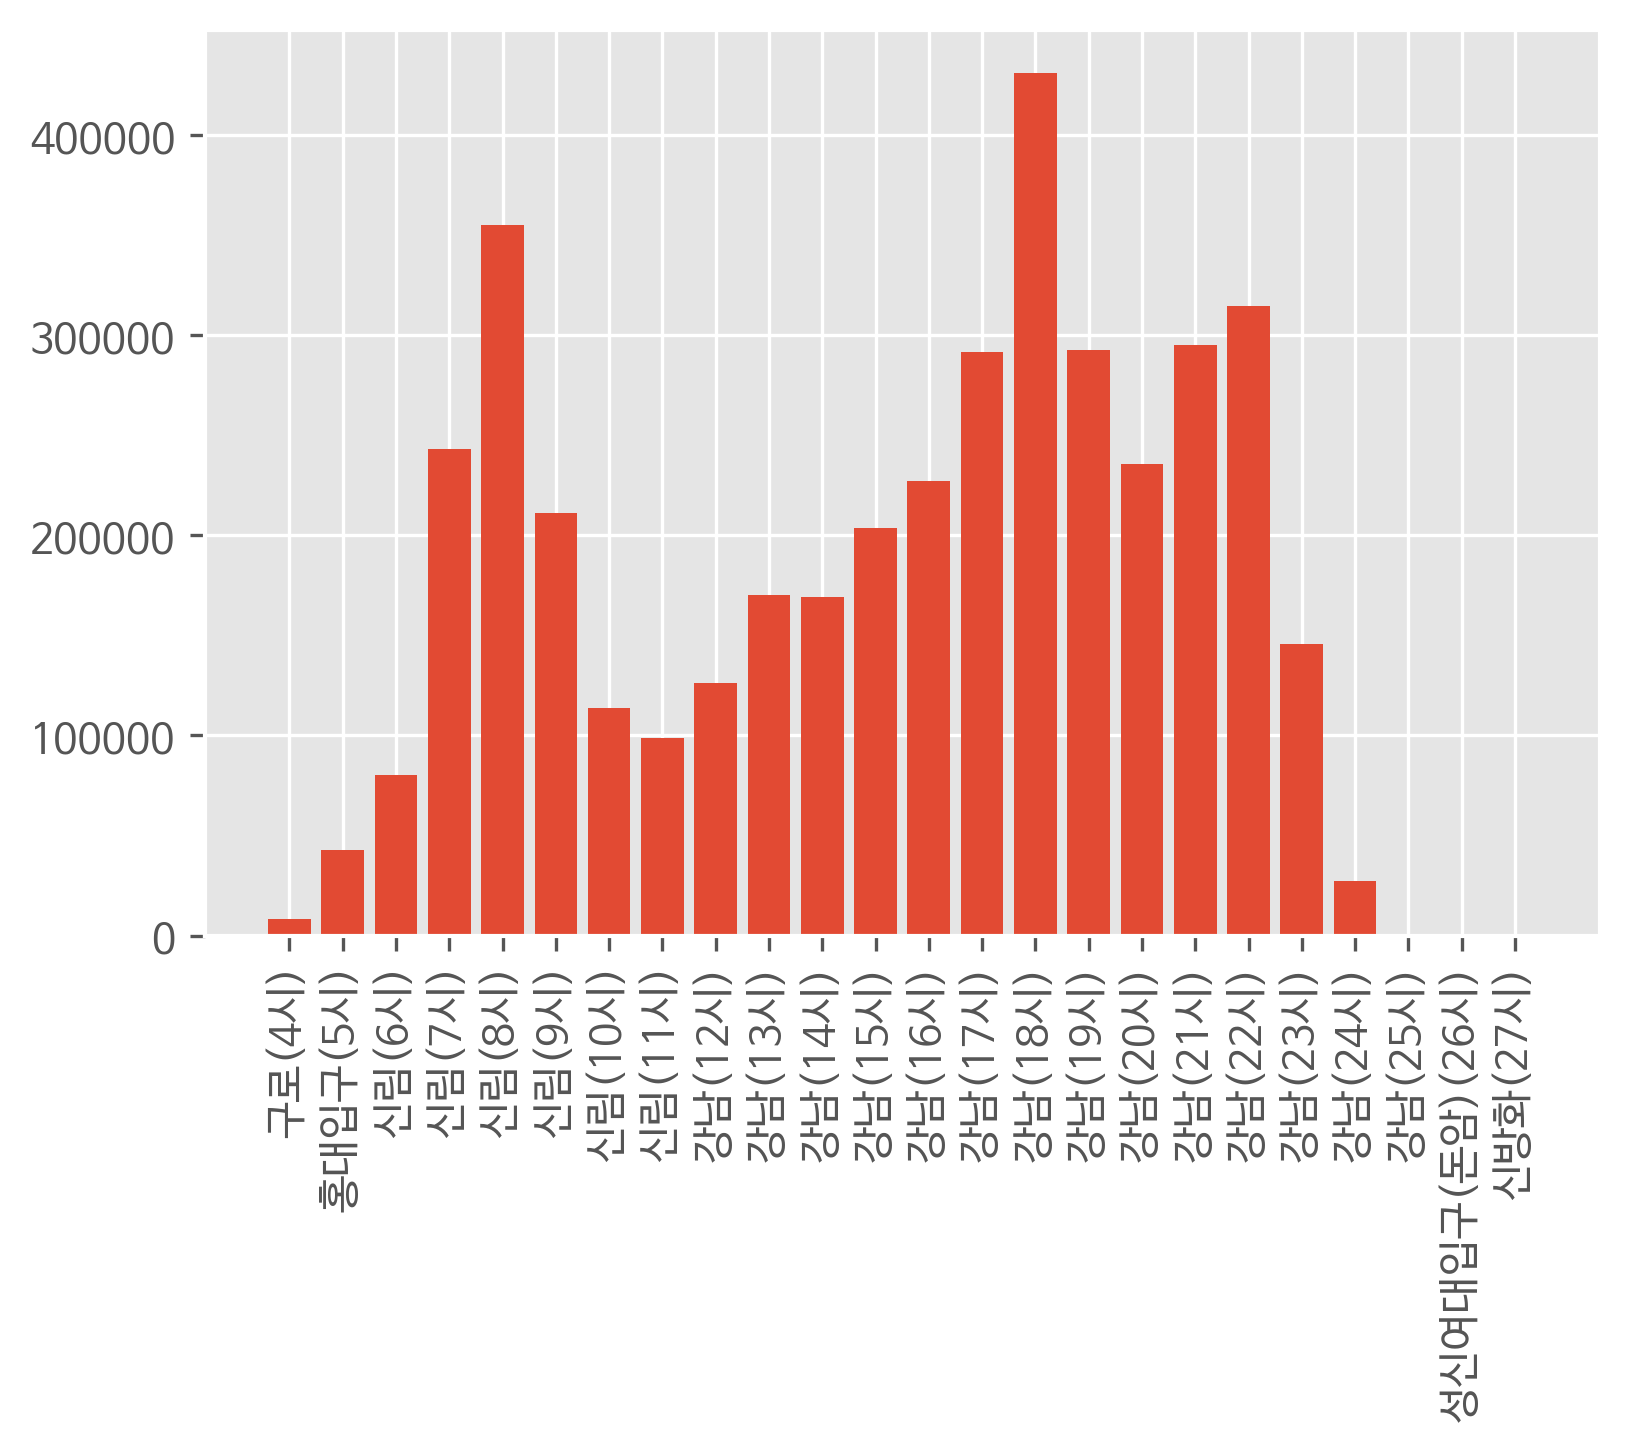

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for j in range(24) :
    a = row[4 + j * 2] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) -> 시작 인덱스 4
    if a > max[j] :
      max[j] = a
      max_station[j] = row[3] + '(' + str(j+4) +'시)'

# 차트 설정
plt.figure(dpi=150) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.style.use('ggplot')
# 차트 그리기
plt.bar(range(24), max)
plt.xticks(range(24), max_station, rotation=90) # rotation=a 은 a도 만큼 x축의 글자를 돌린다
plt.show()

시간대별 최대 하차 역 이름 및 하차 인원 막대 그래프로 표현하기

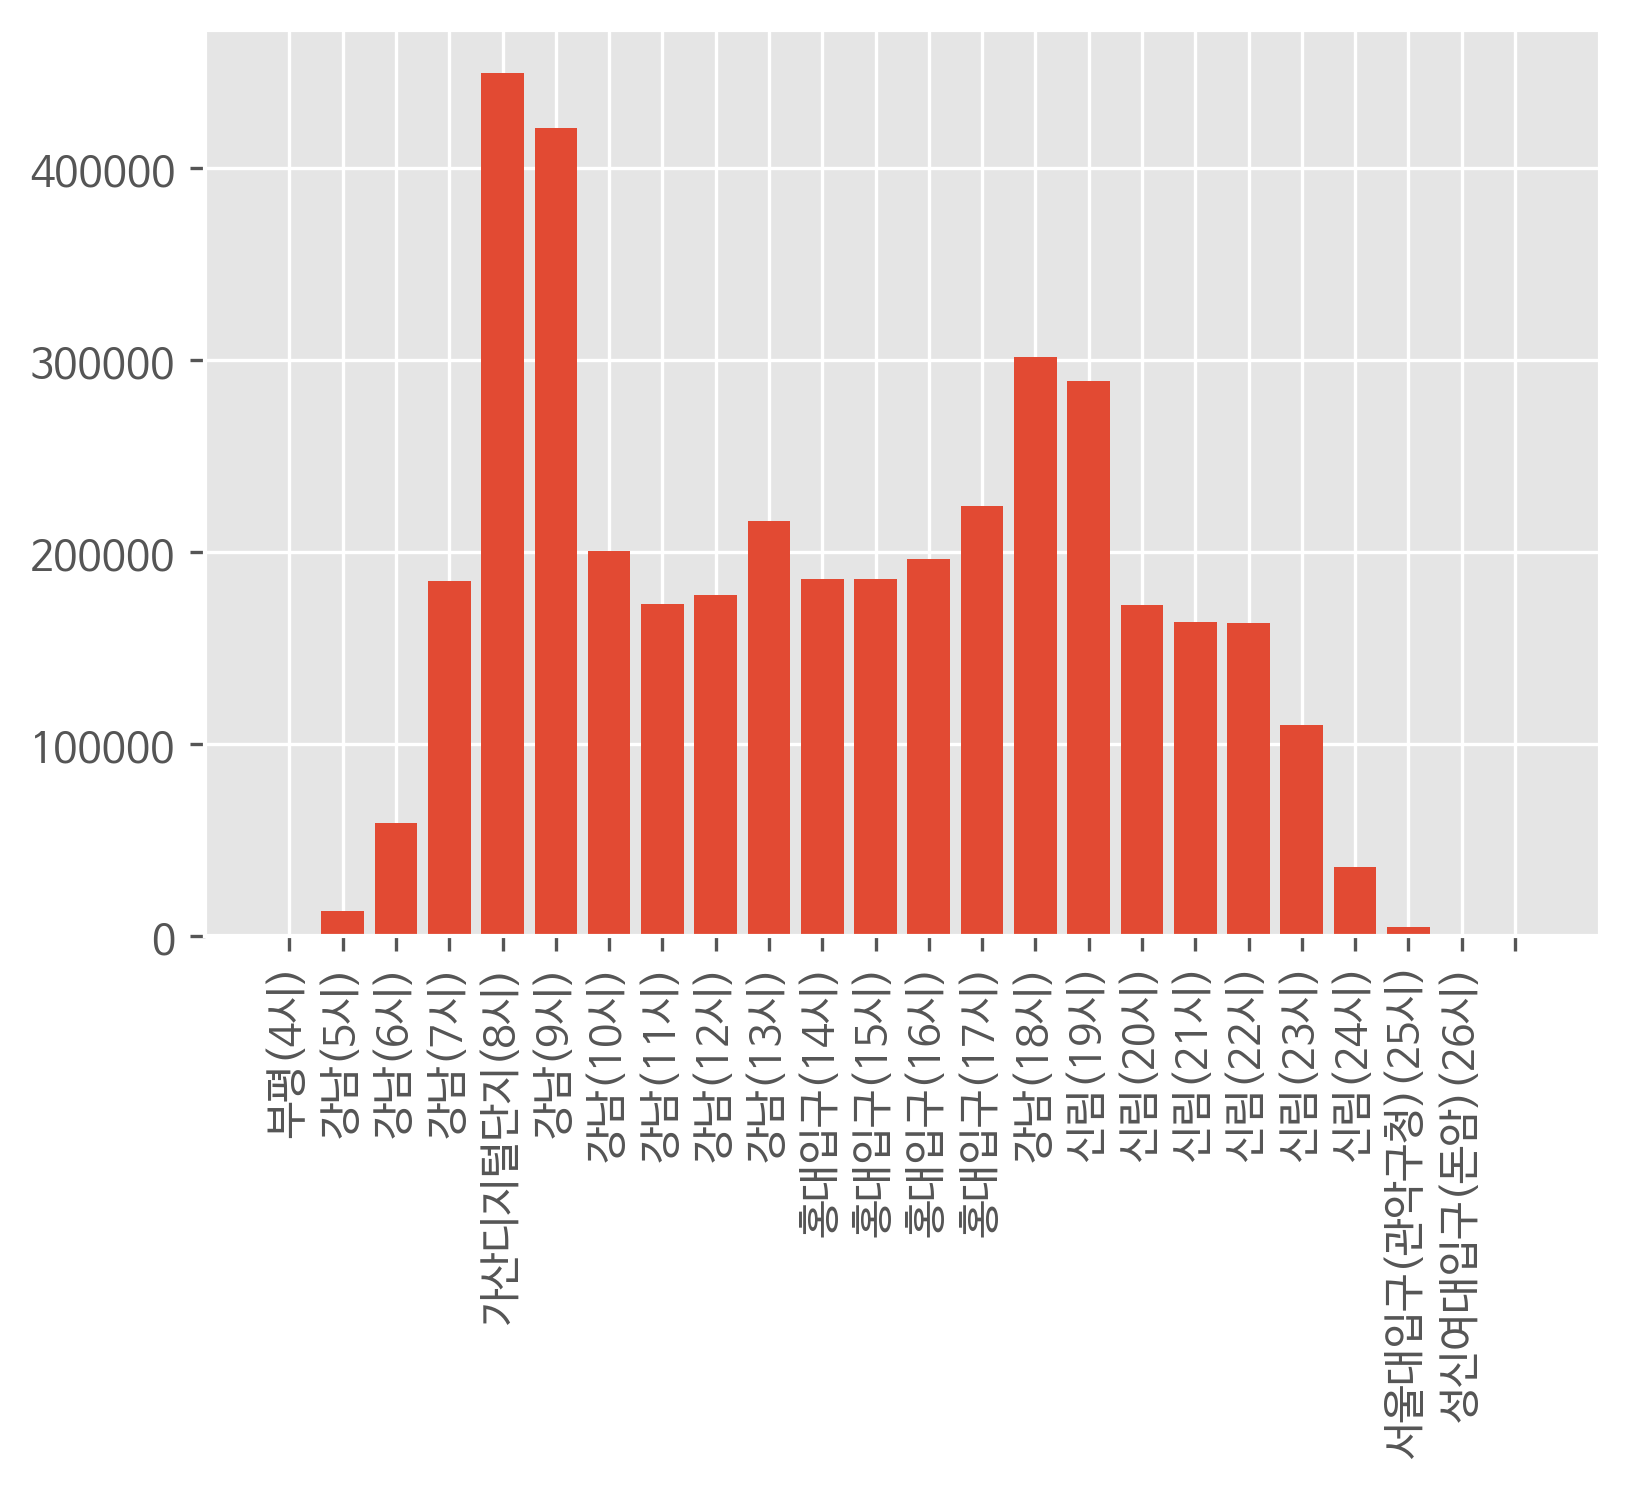

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for j in range(24) :
    a = row[5 + j * 2] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) -> 시작 인덱스 4
    if a > max[j] :
      max[j] = a
      max_station[j] = row[3] + '(' + str(j+4) +'시)'

# 차트 설정
plt.figure(dpi=150) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.style.use('ggplot')
# 차트 그리기
plt.bar(range(24), max)
plt.xticks(range(24), max_station, rotation=90) # rotation=a 은 a도 만큼 x축의 글자를 돌린다
plt.show()

모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

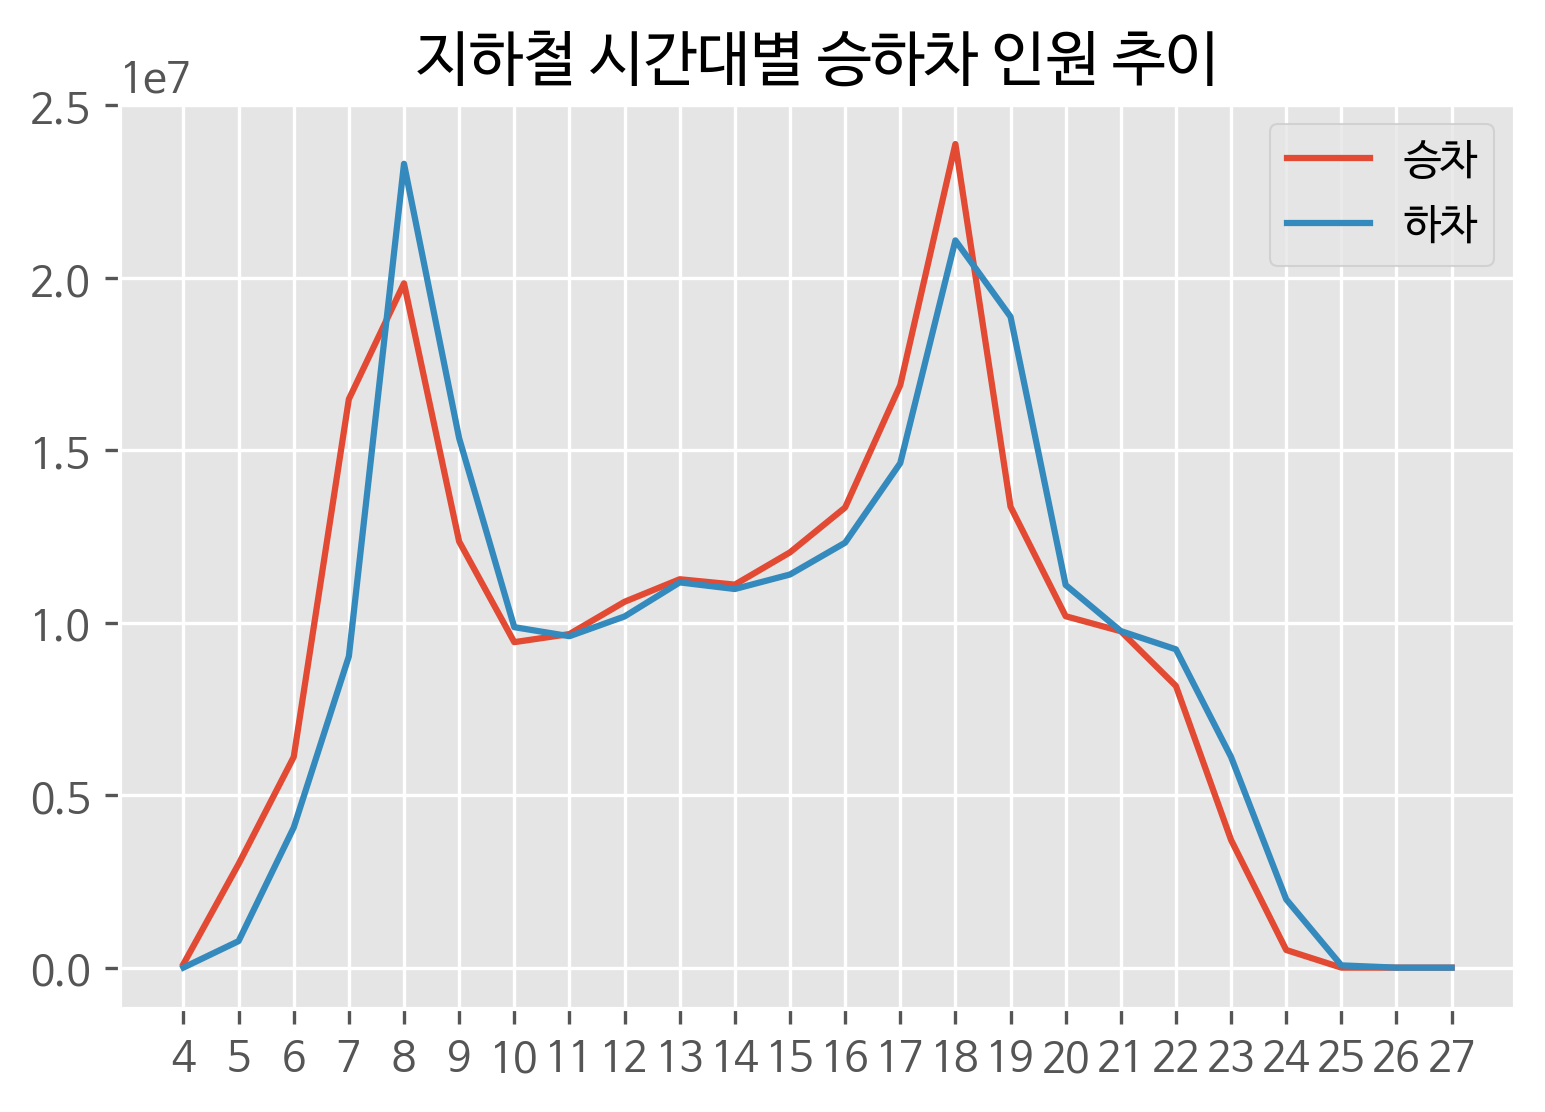

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24
station = [''] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for i in range(24) :
    s_in[i] += row[4 + i * 2] # 승차
    s_out[i] += row[5 + i * 2] # 하차

# 차트 설정
plt.figure(dpi=150) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.style.use('ggplot')
# 차트 그리기
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.xticks(range(24), range(4,28))
plt.legend()
plt.show()